# Инструкция по выполнению

В этом задании вам нужно подобрать оптимальное значение k для алгоритма
kNN. Будем использовать набор данных Wine, где требуется
предсказать сорт винограда, из которого изготовлено вино, используя
результаты химических анализов.
Выполните следующие шаги:
1. Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machinelearning-databases/wine/wine.data
2. Извлеките из данных признаки и классы. Класс записан в первом
столбце (три варианта), признаки — в столбцах со второго по последний.
Более подробно о сути признаков можно прочитать по адресу
https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл
wine.names, приложенный к заданию)
3. Оценку качества необходимо провести методом кросс-валидации по
5 блокам (5-fold). Создайте генератор разбиений, который перемешивает
выборку перед формированием блоков (shuffle=True). Для
3
воспроизводимости результата, создавайте генератор KFold с фиксированным
параметром random_state=42. В качестве меры качества
используйте долю верных ответов (accuracy).
4. Найдите точность классификации на кросс-валидации для метода
k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при
k от 1 до 50. При каком k получилось оптимальное качество? Чему
оно равно (число в интервале от 0 до 1)? Данные результаты и
будут ответами на вопросы 1 и 2.
5. Произведите масштабирование признаков с помощью функции
sklearn.preprocessing.scale. Снова найдите оптимальное k на кроссвалидации.
6. Какое значение k получилось оптимальным после приведения признаков
к одному масштабу? Как изменилось значение качества?
Приведите ответы на вопросы 3 и 4.
Если ответом является нецелое число, то целую и дробную часть необходимо
разграничивать точкой, например, 0.5. При необходимости округляйте
дробную часть до двух знаков.
Ответ на каждое задание — текстовый файл, содержащий ответ в
первой строчке. Обратите внимание, что отправляемые файлы не должны
содержать пустую строку в конце. Данный нюанс является ограничением
платформы Coursera. Мы работаем над тем, чтобы убрать это
ограничение.

In [63]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, model_selection, preprocessing
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data = pd.read_csv('wine.data', header=-1, )

In [53]:
data.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [56]:
X = data.iloc[:, 1:]
y = data.iloc[:, :1]

In [60]:
cv = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)

Ищем оптимальное k в промежутке от 1 до 50

<function matplotlib.pyplot.show>

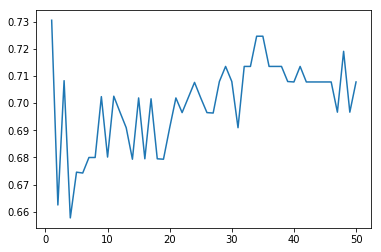

In [64]:
accuracies = []
for i in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=i)
    accuracy = np.mean(model_selection.cross_val_score(model, X, y, cv=cv))
    accuracies.append(accuracy)
xx = [i for i in range(1, 51)]
plt.plot(xx, accuracies)
plt.show

In [65]:
accuracies[0]

0.7304761904761905

Производим масштабирование признаков

In [66]:
X_scale = preprocessing.scale(X, axis=0)

<function matplotlib.pyplot.show>

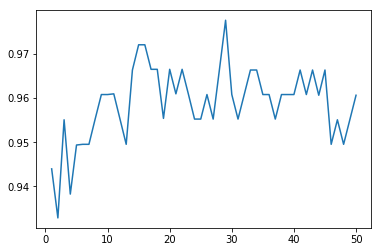

In [69]:
accuracies = []
for i in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=i)
    accuracy = np.mean(model_selection.cross_val_score(model, X_scale, y, cv=cv))
    accuracies.append(accuracy)
xx = [i for i in range(1, 51)]
plt.plot(xx, accuracies)
plt.show

In [71]:
for i in range(1, len(accuracies) + 1):
    print('K={} '.format(i))
    print('Accuracy={}'.format(accuracies[i - 1]))

K=1 
Accuracy=0.943968253968
K=2 
Accuracy=0.932857142857
K=3 
Accuracy=0.955079365079
K=4 
Accuracy=0.938253968254
K=5 
Accuracy=0.949365079365
K=6 
Accuracy=0.949523809524
K=7 
Accuracy=0.949523809524
K=8 
Accuracy=0.955238095238
K=9 
Accuracy=0.960793650794
K=10 
Accuracy=0.960793650794
K=11 
Accuracy=0.960952380952
K=12 
Accuracy=0.955238095238
K=13 
Accuracy=0.949523809524
K=14 
Accuracy=0.966349206349
K=15 
Accuracy=0.972063492063
K=16 
Accuracy=0.972063492063
K=17 
Accuracy=0.966507936508
K=18 
Accuracy=0.966507936508
K=19 
Accuracy=0.955396825397
K=20 
Accuracy=0.966507936508
K=21 
Accuracy=0.960952380952
K=22 
Accuracy=0.966507936508
K=23 
Accuracy=0.960952380952
K=24 
Accuracy=0.955238095238
K=25 
Accuracy=0.955238095238
K=26 
Accuracy=0.960793650794
K=27 
Accuracy=0.955238095238
K=28 
Accuracy=0.966349206349
K=29 
Accuracy=0.977619047619
K=30 
Accuracy=0.960793650794
K=31 
Accuracy=0.955238095238
K=32 
Accuracy=0.960793650794
K=33 
Accuracy=0.966349206349
K=34 
Accuracy=0.96